# Project 2 Investigate Soccer Dataset

### Question that will be answered at the end of the analysis

* Which team has scored maximum number of goals in all the matches played and how many?
* Which team has scored minimum number of goals in all the matches played and how many?
* In a match which team is more likely to win the match (home  or away).
* What is the likelihood of a match with a result and not resulting in a tie?
* In what condition is a team more likely to score a goal?
* Which league has most number of goals scored?
* Which season has the maximum number of matches without a result?

> This analysis was conduted on majorly 3 tables (Match, League, Team) for this project. A more extensive analysis can be performed if other tables are also used.

### Data cleaning/wrangling approach
This was concise decision take to avoid data cleaning as much as possible and only work with data that does not need extensive cleaning and in doing so SQL Inner joins were used and only those Columns were selectd which did not have the need for data cleaning.
Still not relying solely on the fetched data checks were perfoemd after every database query for Null values and Duplicate records and if found were take care of accordingly.
Steps performed for data wrangling:
* SQL JOINS (INNER) used to fetch data from the tables
* Checks for null values were performed
* Null valules if any vere dropped
* Checks for duplicate values were performed
* Duplicate records if any were dropped

### References
* https://www.kaggle.com/hugomathien/soccer? for better understanding of the dataset
* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html for pandas documentation
* https://stackoverflow.com/ in other cases when needed help

### Import all the necessary packages

In [ ]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Open connection with the SQL Database and check if it works

In [485]:
con = sql.connect('soccer.sqlite')
# Find out the tables in the databse
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [23]:
df_countries = pd.read_sql_query('Select * from Country', con)
df_countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


### Explore Tables and their attributes i.e shape, unique values etc. one by one
This is not the best and the optimized way but this is what i could come up with as did not wanted to go and explore each table separately and did that is one single piece of code. Also this was a SQL Lite database and not a CSV file.

In [63]:
for table in np.delete(tables.values, 0):
    df_tmp = pd.read_sql_query('Select * from {}'.format(table), con)
    print (100*('#'))
    print("Table Name: {} --- Rows: {} --- Columns: {} --- Unique values: {}"
          .format(table, df_tmp.shape[0], df_tmp.shape[1], df_tmp.nunique().sum()))
    print('Null values-----------')
    navals = df_tmp.isna().sum()
    print('Total Null Values: {}'.format(navals.sum()))
    print("Duplicated Records: {}".format(df_tmp.duplicated().sum()))
    print(navals)


####################################################################################################
Table Name: Player_Attributes --- Rows: 183978 --- Columns: 42 --- Unique values: 209464
Null values-----------
Total Null Values: 47301
Duplicated Records: 0
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina     

### Analyse matches played per season
Explore the matches played in different season focusing on the number of matches that were played in each season thus far.

In [486]:
# get the matches played in one season
matches_season = pd.read_sql_query('Select count(*) as matches, season from Match group by season', con)
matches_season.head()


,matches,season
0,3326,2008/2009
1,3230,2009/2010
2,3260,2010/2011
3,3220,2011/2012
4,3260,2012/2013


In [487]:
# check for null values
matches_season.isna().sum()

matches    0
season     0
dtype: int64

In [490]:
# check for duplicated records values
matches_season.duplicated().sum()

0

In [521]:
matches_season

,matches,season
0,3326,2008/2009
1,3230,2009/2010
2,3260,2010/2011
3,3220,2011/2012
4,3260,2012/2013
5,3032,2013/2014
6,3325,2014/2015
7,3326,2015/2016


##### Create a visualization showing the number of matches that were played in each season, to get a view of how the number of matches vary inf different seasons.

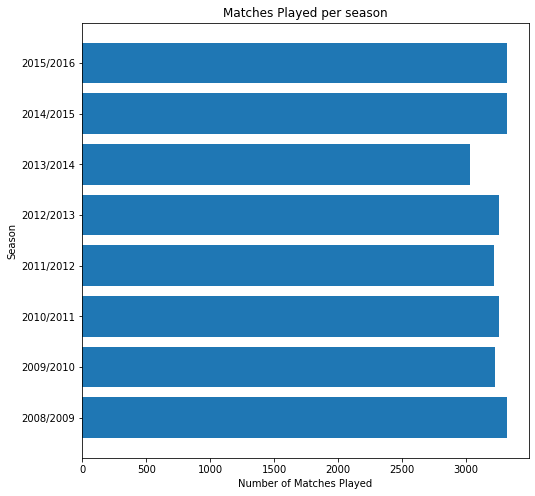

In [483]:
plt.figure(figsize=(8,8));
plt.barh(matches_season['season'], matches_season['matches'])
plt.ylabel('Season')
plt.xlabel('Number of Matches Played')
plt.title('Matches Played per season');

### Some utilities that will prove helpful
Functions that can be used to ease out the process.

In [119]:
# A function to decide the result of the match based on the number of goals scored by home team and away team
def match_result(home_goals, away_goals):
    if (home_goals > away_goals):
        return 'Home'
    elif (home_goals < away_goals):
        return 'Away'
    else:
        return 'Tie'
    

## Analyse results of total matches played and leagues
Analysing the result of all the matches that have been played so for based on the result of the match i.e. (Home team win, Away team win or Tied)

In [496]:
# Get the details of goals scored in a match and its season and league. Inner JOIN is used to avoid additional data cleaning
# But in this case there was no need as the result of equal to the number of actual rows in the Matc table i.e 25979

# Join/Merge Team and League Table to get the necessary data

matches_leagues = pd.read_sql_query('Select m.match_api_id, m.home_team_goal, m.away_team_goal, m.season, l.name from Match m JOIN League l ON l.id = m.league_id', con)
matches_leagues['result'] = matches_leagues.apply(lambda row: match_result(row['home_team_goal'],row['away_team_goal']), axis=1 )

matches_leagues.head()


,match_api_id,home_team_goal,away_team_goal,season,name,result
0,492473,1,1,2008/2009,Belgium Jupiler League,Tie
1,492474,0,0,2008/2009,Belgium Jupiler League,Tie
2,492475,0,3,2008/2009,Belgium Jupiler League,Away
3,492476,5,0,2008/2009,Belgium Jupiler League,Home
4,492477,1,3,2008/2009,Belgium Jupiler League,Away


In [497]:
# check for null values
matches_leagues.isna().sum()

match_api_id      0
home_team_goal    0
away_team_goal    0
season            0
name              0
result            0
dtype: int64

In [498]:
# check the shape of the dataframe
matches_leagues.shape

(25979, 6)

In [499]:
# check the duplicated records
matches_leagues.duplicated().sum()

0

In [463]:
matches_leagues.describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


In [248]:
# check if there are any null values
matches_leagues.isna().sum()

country           0
home_team_goal    0
away_team_goal    0
season            0
name              0
result            0
dtype: int64

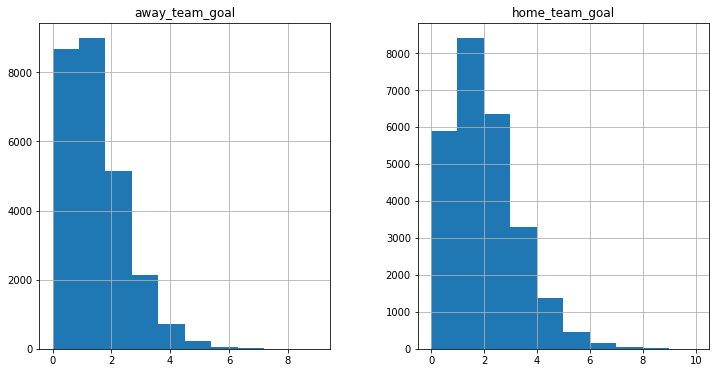

In [468]:
matches_leagues.hist(figsize=(12,6));

In [459]:
# number of matches that were tied/ away team win/ home team win
match_leagues_results = matches_leagues.groupby('result').count()
match_leagues_results

,home_team_goal,away_team_goal,season,name
result,,,,
Away,7466,7466,7466,7466
Home,11917,11917,11917,11917
Tie,6596,6596,6596,6596


##### Create a visulaization to show how the results of matches looks like in comparison to each other

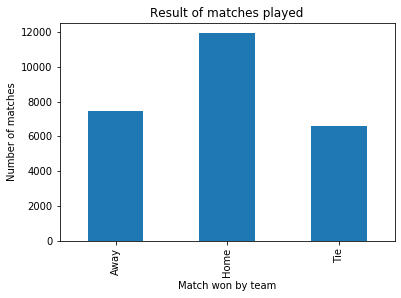

In [252]:
# bar chart for results of matches
match_leagues_results.home_team_goal.plot(kind='bar')
plt.title('Result of matches played')
plt.xlabel('Match won by team')
plt.ylabel('Number of matches');

In [195]:
# calculate percentage of match results
tied_prcnt = match_leagues_results.query('result == "Tie"').home_team_goal / matches_leagues.shape[0] * 100
away_prcnt = match_leagues_results.query('result == "Away"').home_team_goal / matches_leagues.shape[0] * 100
home_prcnt = match_leagues_results.query('result == "Home"').home_team_goal / matches_leagues.shape[0] * 100

##### Create a pie chart visualization to depict the distribution of the match outcomes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


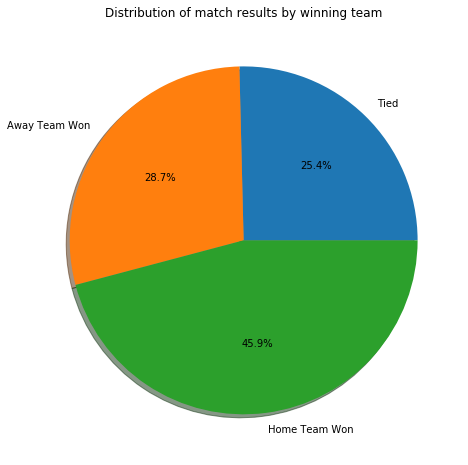

In [254]:
# pie chart for result of matches in percentage
plt.figure(figsize=(8,8));
pie_labels = ['Tied','Away Team Won', 'Home Team Won']
plt.pie([tied_prcnt, away_prcnt, home_prcnt], labels = pie_labels, autopct='%1.1f%%',shadow=True);
plt.title('Distribution of match results by winning team');

### Analyse Goals scored and match results in different Leagues

In [469]:
matches_leagues.groupby('name').home_team_goal.sum()

name
Belgium Jupiler League      2781
England Premier League      4715
France Ligue 1              4265
Germany 1. Bundesliga       3982
Italy Serie A               4528
Netherlands Eredivisie      4357
Poland Ekstraklasa          2678
Portugal Liga ZON Sagres    2890
Scotland Premier League     2607
Spain LIGA BBVA             4959
Switzerland Super League    2365
Name: home_team_goal, dtype: int64

In [481]:
total_away_team_goals = matches_leagues.away_team_goal.sum()
total_home_team_goals = matches_leagues.home_team_goal.sum()
total_away_team_goals,total_home_team_goals

(30160, 40127)

##### Create a visualization showing the relation between number of goals scored when teams are playing in their home ground

Text(0.5, 1.0, 'Goals scored by home teams in different leagues')

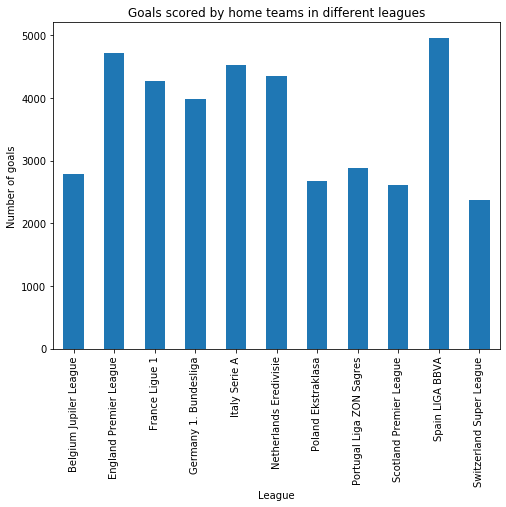

In [465]:
# goals scored in different leagues by home teams
plt.figure(figsize=(8,6));
matches_leagues.groupby('name').home_team_goal.sum().plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Number of goals')
plt.title('Goals scored by home teams in different leagues');

##### Create a Visualization showing the relation between number of goals scored when teams play away from their home ground

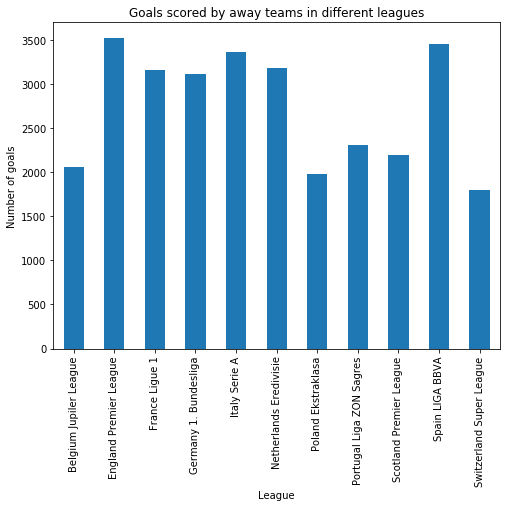

In [258]:
# goals scored in different leagues by away teams
plt.figure(figsize=(8,6));
matches_leagues.groupby('name').away_team_goal.sum().plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Number of goals')
plt.title('Goals scored by away teams in different leagues');

In [470]:
# total goals scored in each league
matches_leagues.groupby('name').away_team_goal.sum() + matches_leagues.groupby('name').home_team_goal.sum()

name
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4656
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
dtype: int64

##### Create a visualization to show the relation between goals scored by teams when they played in Home ground or Away from from home ground

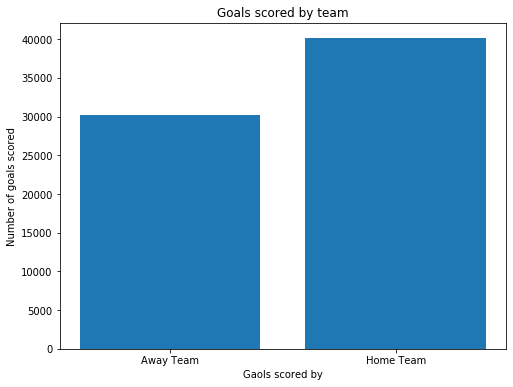

In [522]:
# bar graph of away team goals vs home team goals
plt.figure(figsize=(8,6));
plt.bar(x=[1,2], tick_label =['Away Team', 'Home Team'], height=[total_away_team_goals,total_home_team_goals])
plt.xlabel('Gaols scored by')
plt.ylabel('Number of goals scored')
plt.title('Goals scored by team');

##### Create a visualization to compare the number of goals scored in each league

Text(0.5, 1.0, 'Total goals scored per league')

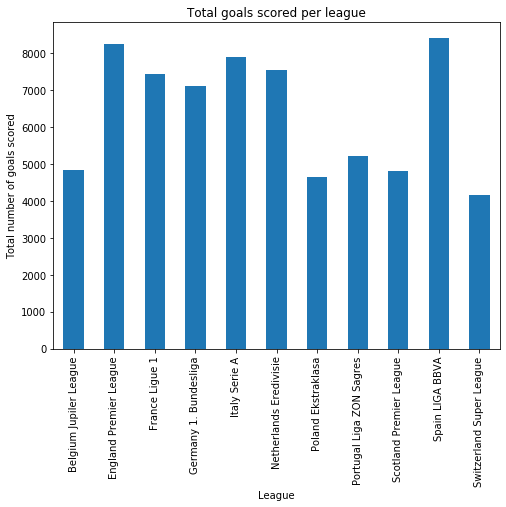

In [262]:
# total goals scored in each league
plt.figure(figsize=(8,6))
total_league_goals_away = matches_leagues.groupby('name').away_team_goal.sum()
total_league_goals_home = matches_leagues.groupby('name').home_team_goal.sum()
total_league_goals = total_league_goals_away + total_league_goals_home
total_league_goals.plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Total number of goals scored')
plt.title('Total goals scored per league')

##### Create a visualization to compare the different results/outcomes of matches in each league

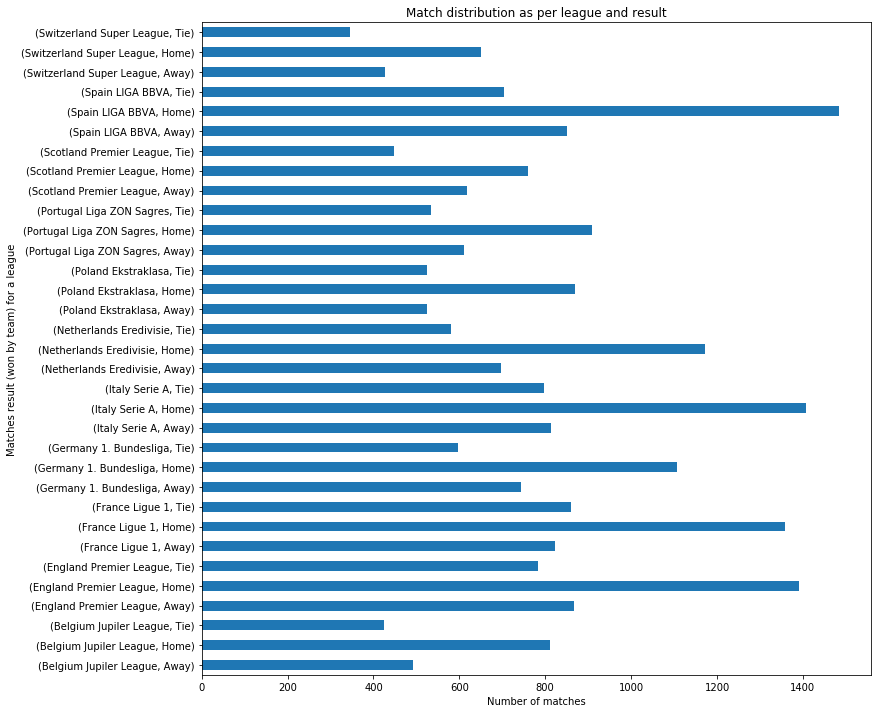

In [237]:
matches_leagues.groupby(['name','result'])['home_team_goal'].count().plot(kind='barh', figsize=(12,12));
plt.xlabel('Number of matches')
plt.ylabel('Matches result (won by team) for a league')
plt.title('Match distribution as per league and result');

##### Create a visualization to show the what number of matches played in each league

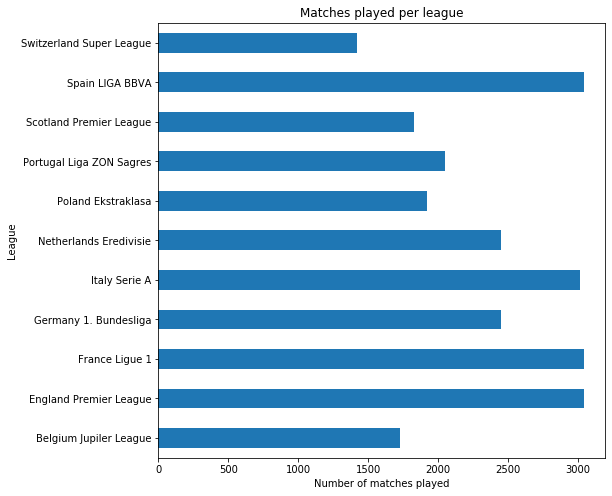

In [241]:
matches_leagues.groupby('name')['home_team_goal'].count().plot(kind='barh', figsize=(8,8));
plt.xlabel('Number of matches played')
plt.ylabel('League')
plt.title('Matches played per league');

In [474]:
matches_leagues.groupby(['season','result'])['home_team_goal'].count()

season     result
2008/2009  Away       929
           Home      1566
           Tie        831
2009/2010  Away       884
           Home      1532
           Tie        814
2010/2011  Away       901
           Home      1520
           Tie        839
2011/2012  Away       904
           Home      1498
           Tie        818
2012/2013  Away       963
           Home      1444
           Tie        853
2013/2014  Away       892
           Home      1404
           Tie        736
2014/2015  Away       981
           Home      1494
           Tie        850
2015/2016  Away      1012
           Home      1459
           Tie        855
Name: home_team_goal, dtype: int64

##### Create a visulization to compare the distribution of Match results/outcomes for each season

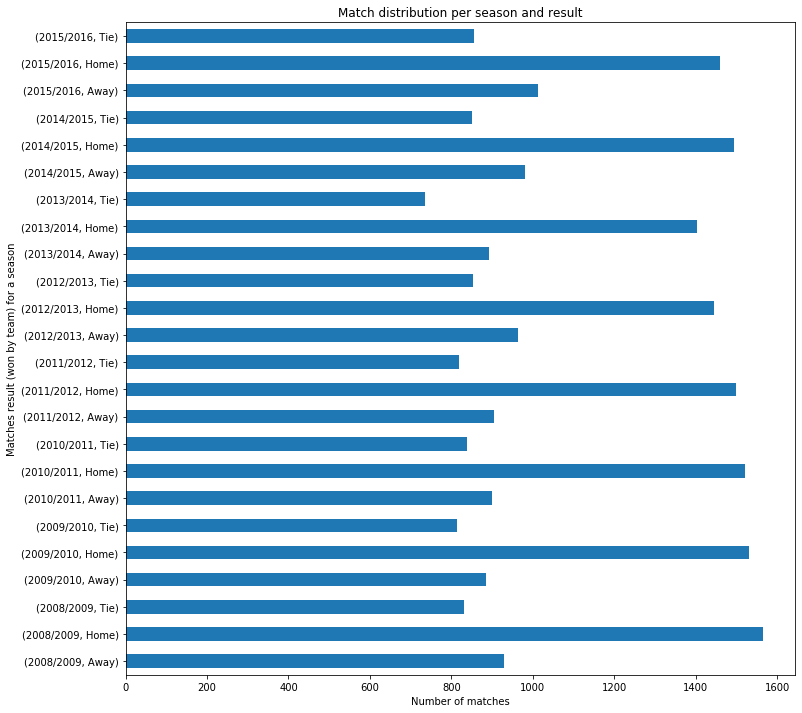

In [244]:
# distribution of mathes per season based on result
matches_leagues.groupby(['season','result'])['home_team_goal'].count().plot(kind='barh', figsize=(12,12));
plt.xlabel('Number of matches')
plt.ylabel('Matches result (won by team) for a season')
plt.title('Match distribution per season and result');

### Analyse matches with respect to teams

In [296]:
# Get the details of goals scored in a match and its seasona and league. Inner JOIN is used to avoid additional data cleaning
# But in this case there was no need as the result of equal to the number of actual rows in the Matc table i.e 25979

# Join/Merge Team and Macth Table to get the necessary data
teams_matches = pd.read_sql_query('Select m.season, m.home_team_goal, m.away_team_goal, t.team_long_name as home_team, t2.team_long_name as away_team from Match m JOIN Team t ON t.team_api_id = m.home_team_api_id JOIN Team t2 ON t2.team_api_id = m.away_team_api_id', con)
teams_matches['result'] = teams_matches.apply(lambda row: match_result(row['home_team_goal'],row['away_team_goal']), axis=1 )

teams_matches.head()

,season,home_team_goal,away_team_goal,home_team,away_team,result
0,2008/2009,1,1,KRC Genk,Beerschot AC,Tie
1,2008/2009,0,0,SV Zulte-Waregem,Sporting Lokeren,Tie
2,2008/2009,0,3,KSV Cercle Brugge,RSC Anderlecht,Away
3,2008/2009,5,0,KAA Gent,RAEC Mons,Home
4,2008/2009,1,3,FCV Dender EH,Standard de Liège,Away


In [501]:
# check for null values
teams_matches.isna().sum()

season            0
home_team_goal    0
away_team_goal    0
home_team         0
away_team         0
result            0
dtype: int64

In [500]:
teams_matches.shape

(25979, 6)

In [502]:
# check for duplicated records
teams_matches.duplicated().sum()

117

In [509]:
# drop the duplicate records 
teams_matches = teams_matches.drop_duplicates()

In [507]:
teams_matches.shape

(25862, 6)

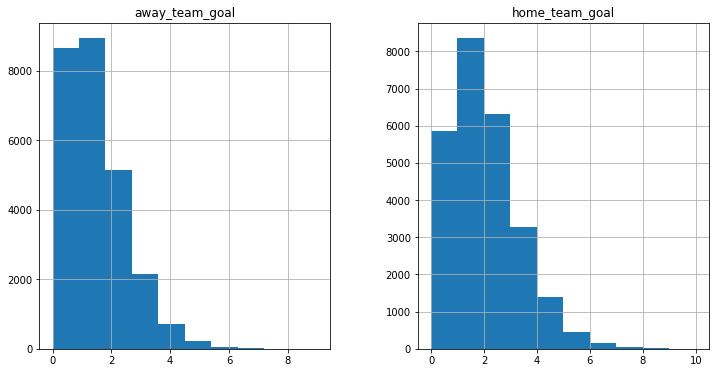

In [508]:
teams_matches.hist(figsize=(12,6));

##### Create a visualization to show the goals scored by top teams when playing in home ground

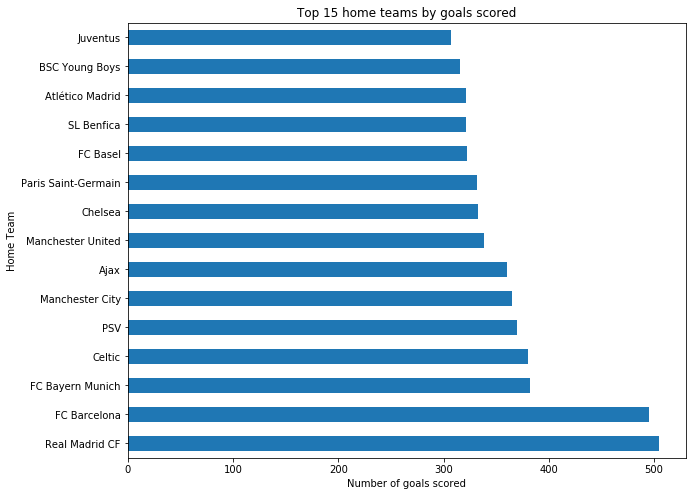

In [510]:
teams_matches.groupby('home_team').home_team_goal.sum().sort_values(ascending=False).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of goals scored')
plt.ylabel('Home Team')
plt.title('Top 15 home teams by goals scored');

##### Create a visualization to show the goals scored by bottom teams when playing in home ground

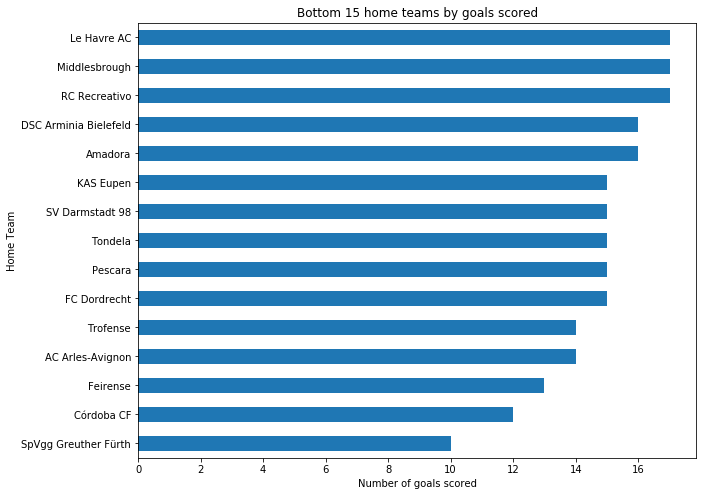

In [511]:
teams_matches.groupby('home_team').home_team_goal.sum().sort_values(ascending=True).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of goals scored')
plt.ylabel('Home Team')
plt.title('Bottom 15 home teams by goals scored');

##### Create a visualization to show the goals scored by top teams when playing away from home ground

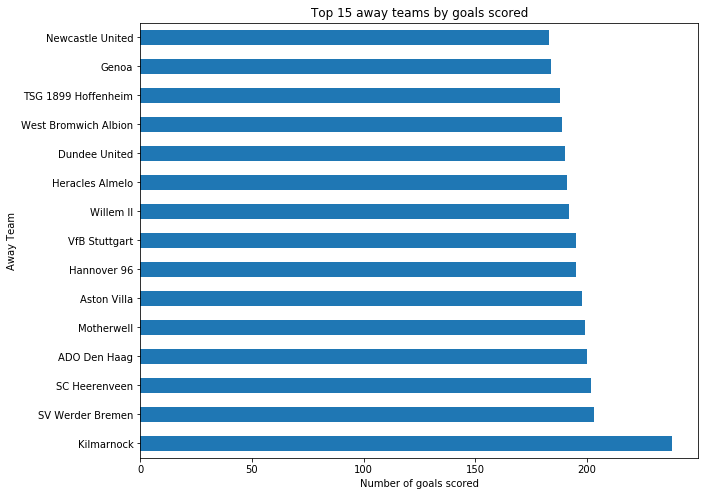

In [512]:
teams_matches.groupby('home_team').away_team_goal.sum().sort_values(ascending=False).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of goals scored')
plt.ylabel('Away Team')
plt.title('Top 15 away teams by goals scored');

##### Create a visualization to show the goals scored by bottom teams when playing away from home ground

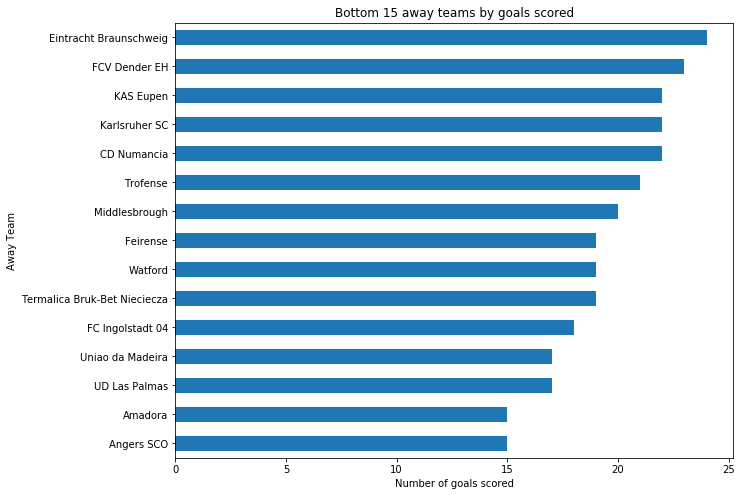

In [513]:
teams_matches.groupby('home_team').away_team_goal.sum().sort_values(ascending=True).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of goals scored')
plt.ylabel('Away Team')
plt.title('Bottom 15 away teams by goals scored');

In [514]:
# calculate total matches played and total goals scored by each team
matches_as_home_team =  teams_matches.groupby('home_team').count()
matches_as_away_team =  teams_matches.groupby('away_team').count()

goals_as_home_team = teams_matches.groupby('home_team').home_team_goal.sum()
goals_as_away_team = teams_matches.groupby('away_team').away_team_goal.sum()

In [515]:
# top 20 teams by number of matches played
total_matches_team = matches_as_home_team.season + matches_as_away_team.season
total_matches_team.sort_values(ascending=False).head(20)

home_team
Paris Saint-Germain       304
Liverpool                 304
Chelsea                   304
Tottenham Hotspur         304
Toulouse FC               304
Stoke City                304
FC Barcelona              304
Stade Rennais FC          304
FC Lorient                304
Sevilla FC                304
Getafe CF                 304
Girondins de Bordeaux     304
Valencia CF               304
Atlético Madrid           304
Everton                   304
LOSC Lille                304
Sunderland                304
Manchester City           304
Manchester United         304
Olympique de Marseille    304
Name: season, dtype: int64

In [516]:
# bottom 20 teams by number of matches played
total_matches_team.sort_values(ascending=True).head(20)

home_team
Portimonense                    30
Termalica Bruk-Bet Nieciecza    30
Trofense                        30
KAS Eupen                       30
Feirense                        30
Amadora                         30
FC Penafiel                     34
Eintracht Braunschweig          34
SC Paderborn 07                 34
Karlsruher SC                   34
Fortuna Düsseldorf              34
SV Darmstadt 98                 34
FCV Dender EH                   34
Lugano                          34
FC Volendam                     34
Uniao da Madeira                34
Tubize                          34
FC St. Pauli                    34
Tondela                         34
DSC Arminia Bielefeld           34
Name: season, dtype: int64

In [517]:
total_goals_team = goals_as_home_team + goals_as_away_team
total_goals_team.sort_values(ascending=False).head(20)

home_team
FC Barcelona           849
Real Madrid CF         843
Celtic                 681
FC Bayern Munich       653
PSV                    652
Ajax                   647
Manchester City        606
FC Basel               594
Chelsea                583
Manchester United      582
Arsenal                573
Paris Saint-Germain    568
SL Benfica             568
Borussia Dortmund      551
Juventus               543
FC Porto               541
Liverpool              531
Roma                   530
Atlético Madrid        524
BSC Young Boys         520
dtype: int64

##### Create a visualization to show the top teams by the number of goals scored in total

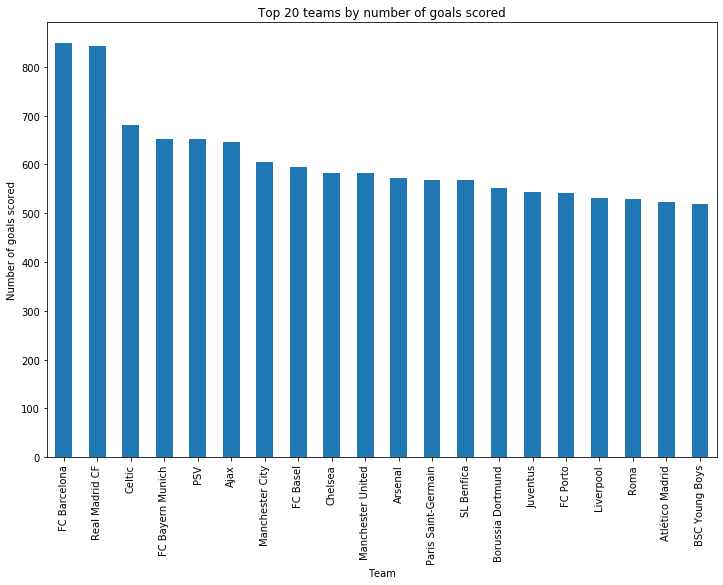

In [518]:

total_goals_team.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12,8))
plt.title('Top 20 teams by number of goals scored')
plt.xlabel('Team')
plt.ylabel('Number of goals scored');

In [519]:
total_goals_team = goals_as_home_team + goals_as_away_team
total_goals_team.sort_values(ascending=True).head(20)

home_team
AC Arles-Avignon            21
Córdoba CF                  22
FC Dordrecht                24
Trofense                    25
Amadora                     26
SpVgg Greuther Fürth        26
Pescara                     27
Uniao da Madeira            27
Feirense                    27
Middlesbrough               28
KAS Eupen                   28
Portimonense                29
FC Penafiel                 29
DSC Arminia Bielefeld       29
Eintracht Braunschweig      29
FC Energie Cottbus          30
Reggio Calabria             30
Karlsruher SC               30
Le Havre AC                 30
US Boulogne Cote D'Opale    31
dtype: int64

##### Create a visualization to show the bottom teams by the number of goals scored in total

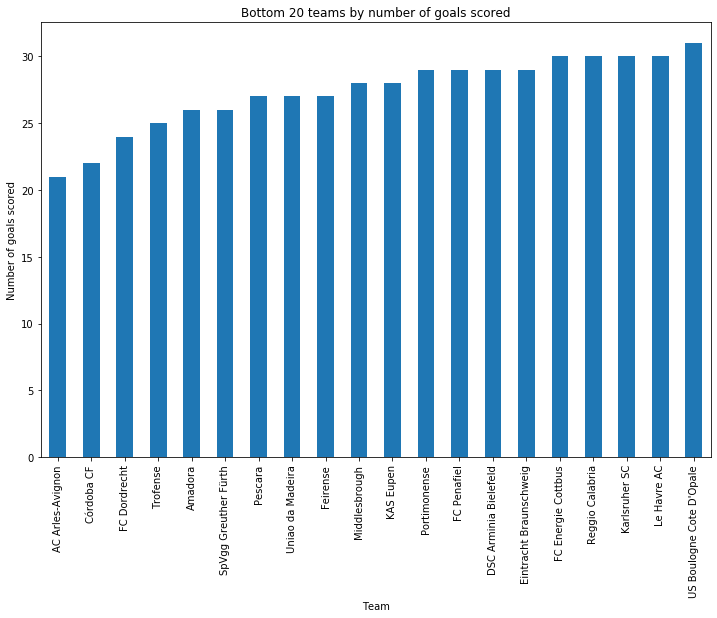

In [520]:
total_goals_team = goals_as_home_team + goals_as_away_team
total_goals_team.sort_values(ascending=True).head(20).plot(kind='bar', figsize=(12,8))
plt.title('Bottom 20 teams by number of goals scored')
plt.xlabel('Team')
plt.ylabel('Number of goals scored');

In [480]:
con.close()

# Limitations

There are some limitations listed below to the analysis which arise due the data in question.
* There are lot of columns in the tables for example Match table has 115 columns out which mist of them do not have a proper explanationof what it is all about.
* Choosing the columns for the analysis. With so little documentation about the dataset specifically about the columns it was challenging to confine the analysis to the columns that were quite evident and made enough sense.

# Conclusions

#### Which team has scored maximum number of goals in all the matches played and how many?
> FC Barcelona have scored the maximum number of goals thus far (849).

#### Which team has scored minimum number of goals in all the matches played and how many?
> AC Arles-Avignon have scored the least number of goals thus far (21)

#### In a match which team is more likely to win the match (home or away).
> In a match the Home team is  more likely to win the game because almost 46% of the matches played thus far have been won by the home team while a chances of away team wining are nearly 29%. Hence its likely that a home team has greater chances of winning a match.

#### What is the likelihood of a match with a result and not resulting in a tie?
> There are 75% chances that a match will be won by either of the teams and only 25% chances that it may end up without a result i,e. getting tied. Which is evident from the fact that matches won by team when playing away from home is 7466 and when playing in home ground is 11917 and 6596 got tied.


#### In what condition is a team more likely to score a goal?
> Based on the above analysis a team is more likely to score a goal when they are playing in their Home ground and less likely when playing away from home. Which is quite evident from the fact that total goals scored by teams over the years when playing in home ground is 40127 and when playing away from home is 30160

#### Which league has most number of goals scored?
> England Premier League has the maximum number of goals scored thus far which is 8240.

#### Which season has the maximum number of matches without a result?
> 2015/2016 has the maximum number of matches(855) without a result